In [99]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
from utils import u_statistics as u_stat
from scipy.stats import norm
import matplotlib.mlab as mlab

coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
file = '/home/ck/DIR/cornkle/data/NFLICS/cell_stats14.2_n18_15.2_n16_Unique_msg9_cell_mean_cellthresh_n70_cellpixlt_n70_freq_mean_00000_refhours_18_21.csv' 

In [4]:
tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [5]:
test= tab[tab.time==tab.time[0]]
test.com_lon.values

array([26.])

In [6]:
tab

time  com_lon  com_lat  cell_min_T  cell_mean_T  \
0   2004-08-07 20:00:00     26.0    235.0       -83.0        -74.0   
1   2005-08-19 18:00:00     19.0    232.0       -79.0        -74.0   
2   2005-08-29 20:00:00     11.0    240.0       -84.0        -74.0   
3   2006-07-24 19:00:00     28.0    224.0       -86.0        -76.0   
4   2006-07-26 18:00:00     13.0    253.0       -84.0        -75.0   
5   2006-08-12 18:00:00     21.0    252.0       -80.0        -74.0   
6   2006-09-07 18:00:00     28.0    224.0       -78.0        -74.0   
7   2007-07-17 18:00:00     24.0    244.0       -87.0        -76.0   
8   2007-07-25 18:00:00     30.0    234.0       -83.0        -74.0   
9   2007-08-02 21:00:00     28.0    237.0       -80.0        -74.0   
10  2007-08-23 18:00:00     19.0    234.0       -78.0        -73.0   
11  2007-09-06 21:00:00     23.0    228.0       -79.0        -74.0   
12  2007-09-12 21:00:00     22.0    237.0       -86.0        -74.0   
13  2007-09-17 21:00:00     22.0    249.0       -84.0        -75.0   
14  2008-07-29 20:00:00     12.0    234.0       -87.0        -75.0   
15  2008-08-07 19:00:00     29.0    246.0       -82.0        -74.0   
16  2008-08-09 20:00:00     19.0    222.0       -80.0        -74.0   
17  2009-08-08 20:00:00     17.0    248.0       -85.0        -76.0   
18  2009-08-24 21:00:00     21.0    221.0       -84.0        -74.0   
19  2009-08-28 19:00:00     23.0    234.0       -81.0        -72.0   
20  2010-08-31 20:00:00     32.0    243.0       -79.0        -73.0   
21  2011-08-03 19:00:00     20.0    245.0       -74.0        -71.0   
22  2011-08-18 20:00:00     16.0    229.0       -81.0        -72.0   
23  2011-09-12 20:00:00     24.0    237.0       -85.0        -74.0   
24  2012-07-02 20:00:00     30.0    231.0       -87.0        -77.0   
25  2012-07-12 20:00:00     11.0    220.0       -88.0        -77.0   
26  2012-08-26 18:00:00     10.0    232.0       -84.0        -74.0   
27  2012-09-04 20:00:00     32.0    227.0       -82.0        -75.0   
28  2012-09-06 18:00:00     12.0    230.0       -84.0        -74.0   
29  2012-09-07 18:00:00     11.0    249.0       -81.0        -73.0   
30  2013-08-06 21:00:00     31.0    233.0       -75.0        -71.0   
31  2013-08-07 18:00:00     10.0    225.0       -84.0        -73.0   
32  2013-09-17 19:00:00     22.0    221.0       -86.0        -73.0   
33  2014-08-26 18:00:00     27.0    225.0       -75.0        -71.0   
34  2014-08-27 19:00:00     28.0    241.0       -89.0        -77.0   
35  2014-08-28 20:00:00     28.0    248.0       -84.0        -75.0   
36  2014-09-09 20:00:00     24.0    246.0       -82.0        -74.0   
37  2014-09-16 18:00:00     18.0    237.0       -89.0        -76.0   
38  2015-07-25 19:00:00     16.0    233.0       -87.0        -78.0   
39  2015-07-27 21:00:00     29.0    225.0       -84.0        -74.0   
40  2015-08-22 21:00:00     27.0    232.0       -79.0        -73.0   
41  2015-08-29 21:00:00     18.0    243.0       -81.0        -75.0   
42  2015-09-23 20:00:00     29.0    229.0       -82.0        -74.0   
43  2015-09-29 18:00:00     22.0    243.0       -78.0        -73.0   
44  2016-09-09 18:00:00     15.0    224.0       -81.0        -75.0   

    cell_area_km2  
0         8067.97  
1        18732.42  
2        16755.44  
3         6564.46  
4        12379.89  
5        10431.65  
6         8965.96  
7         9453.58  
8        13388.85  
9        13366.93  
10        8979.17  
11       20107.73  
12        6713.26  
13       22847.95  
14        6338.33  
15       20914.77  
16        9521.68  
17       16748.80  
18        6881.40  
19        6426.24  
20       35021.53  
21       25829.56  
22       14445.88  
23       14192.11  
24       38914.62  
25        5902.63  
26        7902.30  
27       11884.49  
28        8505.30  
29        8060.88  
30       12360.40  
31        9778.10  
32        8927.27  
33       10081.55  
34       71235.99  
35        8055.57  
36       17529.08  
37       10894.65  
38       10218.51 

In [7]:
pd.to_datetime(tab.time.values[0]).month

8

In [8]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [24]:
def run(shift):

    kernel2_list = []
    kernel3_list = []
    cnt_list = []


    for date in tab.time:


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
        
        #ipdb.set_trace()
        fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)
        
        lpath = '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf/'

        try:
            #ipdb.set_trace()
            lsta = xr.open_dataset(lpath + 'HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_' + fdate + '1700.nc') #sma  #'AMSR_L3_LPRMv05_A_'

        except:
            print('Could not find '+fdate)


        testbox = lsta['lsta'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values

        if np.isnan(testbox).all():
                print('Testbox empty')
                continue

        lsta = lsta.sel(lon=slice(-19, -2), lat=slice(8, 25))    
        #lsta = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day))


        lsta_da = lsta['lsta'].squeeze()
    #     booleans = np.zeros_like(lsta_da.values) * np.nan
    #     booleans[lsta_da.values>4] = 1
    #     booleans[lsta_da.values<-4] = -1

        #lsta_da.values = booleans


    #     point = lsta_da.sel(lat=single.com_lat.values, lon=single.com_lon.values, method='nearest')
    #     if np.isnan(point.values):
    #         continue



        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')
    #     plat = point['lat'].values
    #     plon = point['lon'].values

    #     xpos = np.where(lsta_da['lon'].values == plon)
    #     xpos = int(xpos[0])
    #     ypos = np.where(lsta_da['lat'].values == plat)
    #     ypos = int(ypos[0])


    #     try:
    #         rkernel2, rkernel3, rcnt = cut_kernel(xpos, ypos, lsta_da, dt, plon, plat)
    #     except TypeError:
    #         continue

        cnt = np.zeros_like(lsta_da.values)
        cnt[np.isfinite(lsta_da.values)] = 1

        kernel2_list.append(lsta_da.values)
        kernel3_list.append(lsta_da.values- np.nanmean(lsta_da.values))
        cnt_list.append(cnt) 

        lat = lsta.lat.values
        lon = lsta.lon.values

    kernel2_sum = np.nansum(np.stack(kernel2_list, axis=0), axis=0)
    kernel3_sum = np.nansum(np.stack(kernel3_list, axis=0), axis=0)
    cnt_sum = np.nansum(np.stack(cnt_list, axis=0), axis=0)
    return kernel2_sum, kernel3_sum, cnt_sum, lsta_da

In [25]:
ano, regional,cnt, da = run(-1)

Doing AMSR_20040806.nc
Doing AMSR_20050818.nc
Doing AMSR_20050828.nc
Doing AMSR_20060723.nc
Doing AMSR_20060725.nc
Doing AMSR_20060811.nc
Doing AMSR_20060906.nc
Doing AMSR_20070716.nc
Doing AMSR_20070724.nc
Doing AMSR_20070801.nc
Doing AMSR_20070822.nc
Doing AMSR_20070905.nc
Doing AMSR_20070911.nc
Doing AMSR_20070916.nc
Doing AMSR_20080728.nc
Doing AMSR_20080806.nc
Doing AMSR_20080808.nc
Doing AMSR_20090807.nc
Doing AMSR_20090823.nc
Doing AMSR_20090827.nc
Doing AMSR_20100830.nc
Doing AMSR_20110802.nc
Doing AMSR_20110817.nc
Doing AMSR_20110911.nc
Doing AMSR_20120701.nc
Doing AMSR_20120711.nc
Doing AMSR_20120825.nc
Doing AMSR_20120903.nc
Doing AMSR_20120905.nc
Doing AMSR_20120906.nc
Doing AMSR_20130805.nc
Doing AMSR_20130806.nc
Doing AMSR_20130916.nc
Doing AMSR_20140825.nc
Doing AMSR_20140826.nc
Doing AMSR_20140827.nc
Doing AMSR_20140908.nc
Doing AMSR_20140915.nc
Doing AMSR_20150724.nc
Doing AMSR_20150726.nc
Doing AMSR_20150821.nc
Doing AMSR_20150828.nc
Doing AMSR_20150922.nc
Doing AMSR_

In [26]:
da

<xarray.DataArray 'lsta' (lat: 428, lon: 610)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ..., -4.44, -5.07, -5.95],
       [  nan,   nan,   nan, ..., -4.24, -4.79, -4.91],
       [  nan,   nan,   nan, ..., -4.32, -3.92, -4.68]])
Coordinates:
  * lat      (lat) float64 8.022 8.05 8.079 8.107 ... 19.92 19.94 19.97 20.0
  * lon      (lon) float64 -19.0 -18.97 -18.94 -18.91 ... -2.077 -2.049 -2.021
Attributes:
    MISSING_VALUE:   -9999
    SCALING_FACTOR:  100.0
    OFFSET:          0.0

In [29]:
def draw_map(ax, t, lat, lon, title=''):
   
    plt.contourf(lon-0.3, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=np.linspace(-2,2,6), extend='both')
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('T anomaly (K)')

Doing AMSR_20040802.nc
Doing AMSR_20050814.nc
Doing AMSR_20050824.nc
Doing AMSR_20060719.nc
Doing AMSR_20060721.nc
Doing AMSR_20060807.nc
Doing AMSR_20060902.nc
Doing AMSR_20070712.nc
Doing AMSR_20070720.nc
Doing AMSR_20070728.nc
Doing AMSR_20070818.nc
Doing AMSR_20070901.nc
Doing AMSR_20070907.nc
Doing AMSR_20070912.nc
Doing AMSR_20080724.nc
Doing AMSR_20080802.nc
Doing AMSR_20080804.nc
Doing AMSR_20090803.nc
Could not find 20090819
Doing AMSR_20090819.nc
Doing AMSR_20090823.nc
Doing AMSR_20100826.nc
Doing AMSR_20110729.nc
Doing AMSR_20110813.nc
Doing AMSR_20110907.nc
Doing AMSR_20120627.nc
Doing AMSR_20120707.nc
Doing AMSR_20120821.nc
Doing AMSR_20120830.nc
Doing AMSR_20120901.nc
Doing AMSR_20120902.nc
Doing AMSR_20130801.nc
Doing AMSR_20130802.nc
Doing AMSR_20130912.nc
Doing AMSR_20140821.nc
Doing AMSR_20140822.nc
Doing AMSR_20140823.nc
Doing AMSR_20140904.nc
Doing AMSR_20140911.nc
Doing AMSR_20150720.nc
Doing AMSR_20150722.nc
Doing AMSR_20150817.nc
Doing AMSR_20150824.nc
Doing AMSR

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Doing AMSR_20040803.nc
Doing AMSR_20050815.nc
Doing AMSR_20050825.nc
Doing AMSR_20060720.nc
Doing AMSR_20060722.nc
Doing AMSR_20060808.nc
Doing AMSR_20060903.nc
Doing AMSR_20070713.nc
Doing AMSR_20070721.nc
Doing AMSR_20070729.nc
Doing AMSR_20070819.nc
Doing AMSR_20070902.nc
Doing AMSR_20070908.nc
Doing AMSR_20070913.nc
Doing AMSR_20080725.nc
Doing AMSR_20080803.nc
Doing AMSR_20080805.nc
Doing AMSR_20090804.nc
Could not find 20090820
Doing AMSR_20090820.nc
Doing AMSR_20090824.nc
Doing AMSR_20100827.nc
Doing AMSR_20110730.nc
Doing AMSR_20110814.nc
Doing AMSR_20110908.nc
Doing AMSR_20120628.nc
Doing AMSR_20120708.nc
Doing AMSR_20120822.nc
Doing AMSR_20120831.nc
Doing AMSR_20120902.nc
Doing AMSR_20120903.nc
Doing AMSR_20130802.nc
Doing AMSR_20130803.nc
Doing AMSR_20130913.nc
Doing AMSR_20140822.nc
Doing AMSR_20140823.nc
Doing AMSR_20140824.nc
Doing AMSR_20140905.nc
Doing AMSR_20140912.nc
Doing AMSR_20150721.nc
Doing AMSR_20150723.nc
Doing AMSR_20150818.nc
Doing AMSR_20150825.nc
Doing AMSR

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Doing AMSR_20040804.nc
Doing AMSR_20050816.nc
Doing AMSR_20050826.nc
Doing AMSR_20060721.nc
Doing AMSR_20060723.nc
Doing AMSR_20060809.nc
Doing AMSR_20060904.nc
Doing AMSR_20070714.nc
Doing AMSR_20070722.nc
Doing AMSR_20070730.nc
Doing AMSR_20070820.nc
Doing AMSR_20070903.nc
Doing AMSR_20070909.nc
Doing AMSR_20070914.nc
Doing AMSR_20080726.nc
Doing AMSR_20080804.nc
Doing AMSR_20080806.nc
Doing AMSR_20090805.nc
Doing AMSR_20090821.nc
Doing AMSR_20090825.nc
Doing AMSR_20100828.nc
Doing AMSR_20110731.nc
Doing AMSR_20110815.nc
Doing AMSR_20110909.nc
Doing AMSR_20120629.nc
Doing AMSR_20120709.nc
Doing AMSR_20120823.nc
Doing AMSR_20120901.nc
Doing AMSR_20120903.nc
Doing AMSR_20120904.nc
Doing AMSR_20130803.nc
Doing AMSR_20130804.nc
Doing AMSR_20130914.nc
Doing AMSR_20140823.nc
Doing AMSR_20140824.nc
Doing AMSR_20140825.nc
Doing AMSR_20140906.nc
Doing AMSR_20140913.nc
Doing AMSR_20150722.nc
Doing AMSR_20150724.nc
Doing AMSR_20150819.nc
Doing AMSR_20150826.nc
Doing AMSR_20150920.nc
Doing AMSR_

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Doing AMSR_20040805.nc
Doing AMSR_20050817.nc
Doing AMSR_20050827.nc
Doing AMSR_20060722.nc
Doing AMSR_20060724.nc
Doing AMSR_20060810.nc
Doing AMSR_20060905.nc
Doing AMSR_20070715.nc
Doing AMSR_20070723.nc
Doing AMSR_20070731.nc
Doing AMSR_20070821.nc
Doing AMSR_20070904.nc
Doing AMSR_20070910.nc
Doing AMSR_20070915.nc
Doing AMSR_20080727.nc
Doing AMSR_20080805.nc
Doing AMSR_20080807.nc
Doing AMSR_20090806.nc
Doing AMSR_20090822.nc
Doing AMSR_20090826.nc
Doing AMSR_20100829.nc
Doing AMSR_20110801.nc
Doing AMSR_20110816.nc
Doing AMSR_20110910.nc
Doing AMSR_20120630.nc
Doing AMSR_20120710.nc
Doing AMSR_20120824.nc
Doing AMSR_20120902.nc
Doing AMSR_20120904.nc
Doing AMSR_20120905.nc
Doing AMSR_20130804.nc
Doing AMSR_20130805.nc
Doing AMSR_20130915.nc
Doing AMSR_20140824.nc
Doing AMSR_20140825.nc
Doing AMSR_20140826.nc
Doing AMSR_20140907.nc
Doing AMSR_20140914.nc
Doing AMSR_20150723.nc
Doing AMSR_20150725.nc
Doing AMSR_20150820.nc
Doing AMSR_20150827.nc
Doing AMSR_20150921.nc
Doing AMSR_

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Doing AMSR_20040806.nc
Doing AMSR_20050818.nc
Doing AMSR_20050828.nc
Doing AMSR_20060723.nc
Doing AMSR_20060725.nc
Doing AMSR_20060811.nc
Doing AMSR_20060906.nc
Doing AMSR_20070716.nc
Doing AMSR_20070724.nc
Doing AMSR_20070801.nc
Doing AMSR_20070822.nc
Doing AMSR_20070905.nc
Doing AMSR_20070911.nc
Doing AMSR_20070916.nc
Doing AMSR_20080728.nc
Doing AMSR_20080806.nc
Doing AMSR_20080808.nc
Doing AMSR_20090807.nc
Doing AMSR_20090823.nc
Doing AMSR_20090827.nc
Doing AMSR_20100830.nc
Doing AMSR_20110802.nc
Doing AMSR_20110817.nc
Doing AMSR_20110911.nc
Doing AMSR_20120701.nc
Doing AMSR_20120711.nc
Doing AMSR_20120825.nc
Doing AMSR_20120903.nc
Doing AMSR_20120905.nc
Doing AMSR_20120906.nc
Doing AMSR_20130805.nc
Doing AMSR_20130806.nc
Doing AMSR_20130916.nc
Doing AMSR_20140825.nc
Doing AMSR_20140826.nc
Doing AMSR_20140827.nc
Doing AMSR_20140908.nc
Doing AMSR_20140915.nc
Doing AMSR_20150724.nc
Doing AMSR_20150726.nc
Doing AMSR_20150821.nc
Doing AMSR_20150828.nc
Doing AMSR_20150922.nc
Doing AMSR_

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Doing AMSR_20040807.nc
Doing AMSR_20050819.nc
Doing AMSR_20050829.nc
Doing AMSR_20060724.nc
Doing AMSR_20060726.nc
Doing AMSR_20060812.nc
Doing AMSR_20060907.nc
Doing AMSR_20070717.nc
Doing AMSR_20070725.nc
Doing AMSR_20070802.nc
Doing AMSR_20070823.nc
Doing AMSR_20070906.nc
Doing AMSR_20070912.nc
Doing AMSR_20070917.nc
Doing AMSR_20080729.nc
Doing AMSR_20080807.nc
Doing AMSR_20080809.nc
Doing AMSR_20090808.nc
Doing AMSR_20090824.nc
Doing AMSR_20090828.nc
Doing AMSR_20100831.nc
Doing AMSR_20110803.nc
Doing AMSR_20110818.nc
Doing AMSR_20110912.nc
Doing AMSR_20120702.nc
Doing AMSR_20120712.nc
Doing AMSR_20120826.nc
Doing AMSR_20120904.nc
Doing AMSR_20120906.nc
Doing AMSR_20120907.nc
Doing AMSR_20130806.nc
Doing AMSR_20130807.nc
Doing AMSR_20130917.nc
Doing AMSR_20140826.nc
Doing AMSR_20140827.nc
Doing AMSR_20140828.nc
Doing AMSR_20140909.nc
Doing AMSR_20140916.nc
Doing AMSR_20150725.nc
Doing AMSR_20150727.nc
Doing AMSR_20150822.nc
Doing AMSR_20150829.nc
Doing AMSR_20150923.nc
Doing AMSR_

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Doing AMSR_20040808.nc
Doing AMSR_20050820.nc
Doing AMSR_20050830.nc
Doing AMSR_20060725.nc
Doing AMSR_20060727.nc
Doing AMSR_20060813.nc
Doing AMSR_20060908.nc
Doing AMSR_20070718.nc
Doing AMSR_20070726.nc
Doing AMSR_20070803.nc
Doing AMSR_20070824.nc
Doing AMSR_20070907.nc
Doing AMSR_20070913.nc
Doing AMSR_20070918.nc
Doing AMSR_20080730.nc
Doing AMSR_20080808.nc
Doing AMSR_20080810.nc
Doing AMSR_20090809.nc
Doing AMSR_20090825.nc
Doing AMSR_20090829.nc
Doing AMSR_20100901.nc
Doing AMSR_20110804.nc
Doing AMSR_20110819.nc
Doing AMSR_20110913.nc
Doing AMSR_20120703.nc
Doing AMSR_20120713.nc
Doing AMSR_20120827.nc
Doing AMSR_20120905.nc
Doing AMSR_20120907.nc
Doing AMSR_20120908.nc
Doing AMSR_20130807.nc
Doing AMSR_20130808.nc
Doing AMSR_20130918.nc
Doing AMSR_20140827.nc
Doing AMSR_20140828.nc
Doing AMSR_20140829.nc
Doing AMSR_20140910.nc
Doing AMSR_20140917.nc
Doing AMSR_20150726.nc
Doing AMSR_20150728.nc
Doing AMSR_20150823.nc
Doing AMSR_20150830.nc
Doing AMSR_20150924.nc
Doing AMSR_

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


Doing AMSR_20040809.nc
Doing AMSR_20050821.nc
Doing AMSR_20050831.nc
Doing AMSR_20060726.nc
Doing AMSR_20060728.nc
Doing AMSR_20060814.nc
Doing AMSR_20060909.nc
Doing AMSR_20070719.nc
Doing AMSR_20070727.nc
Doing AMSR_20070804.nc
Doing AMSR_20070825.nc
Doing AMSR_20070908.nc
Doing AMSR_20070914.nc
Doing AMSR_20070919.nc
Doing AMSR_20080731.nc
Doing AMSR_20080809.nc
Doing AMSR_20080811.nc
Doing AMSR_20090810.nc
Doing AMSR_20090826.nc
Doing AMSR_20090830.nc
Doing AMSR_20100902.nc
Doing AMSR_20110805.nc
Doing AMSR_20110820.nc
Doing AMSR_20110914.nc
Doing AMSR_20120704.nc
Doing AMSR_20120714.nc
Doing AMSR_20120828.nc
Doing AMSR_20120906.nc
Doing AMSR_20120908.nc
Doing AMSR_20120909.nc
Doing AMSR_20130808.nc
Doing AMSR_20130809.nc
Doing AMSR_20130919.nc
Doing AMSR_20140828.nc
Doing AMSR_20140829.nc
Doing AMSR_20140830.nc
Doing AMSR_20140911.nc
Doing AMSR_20140918.nc
Doing AMSR_20150727.nc
Doing AMSR_20150729.nc
Doing AMSR_20150824.nc
Doing AMSR_20150831.nc
Doing AMSR_20150925.nc
Doing AMSR_

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


Doing AMSR_20040810.nc
Doing AMSR_20050822.nc
Doing AMSR_20050901.nc
Doing AMSR_20060727.nc
Doing AMSR_20060729.nc
Doing AMSR_20060815.nc
Doing AMSR_20060910.nc
Doing AMSR_20070720.nc
Doing AMSR_20070728.nc
Doing AMSR_20070805.nc
Doing AMSR_20070826.nc
Doing AMSR_20070909.nc
Doing AMSR_20070915.nc
Doing AMSR_20070920.nc
Doing AMSR_20080801.nc
Doing AMSR_20080810.nc
Doing AMSR_20080812.nc
Doing AMSR_20090811.nc
Doing AMSR_20090827.nc
Doing AMSR_20090831.nc
Testbox empty
Doing AMSR_20110806.nc
Doing AMSR_20110821.nc
Doing AMSR_20110915.nc
Doing AMSR_20120705.nc
Doing AMSR_20120715.nc
Doing AMSR_20120829.nc
Doing AMSR_20120907.nc
Doing AMSR_20120909.nc
Doing AMSR_20120910.nc
Doing AMSR_20130809.nc
Doing AMSR_20130810.nc
Doing AMSR_20130920.nc
Doing AMSR_20140829.nc
Doing AMSR_20140830.nc
Doing AMSR_20140831.nc
Doing AMSR_20140912.nc
Doing AMSR_20140919.nc
Doing AMSR_20150728.nc
Doing AMSR_20150730.nc
Doing AMSR_20150825.nc
Doing AMSR_20150901.nc
Doing AMSR_20150926.nc
Doing AMSR_20151002.

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


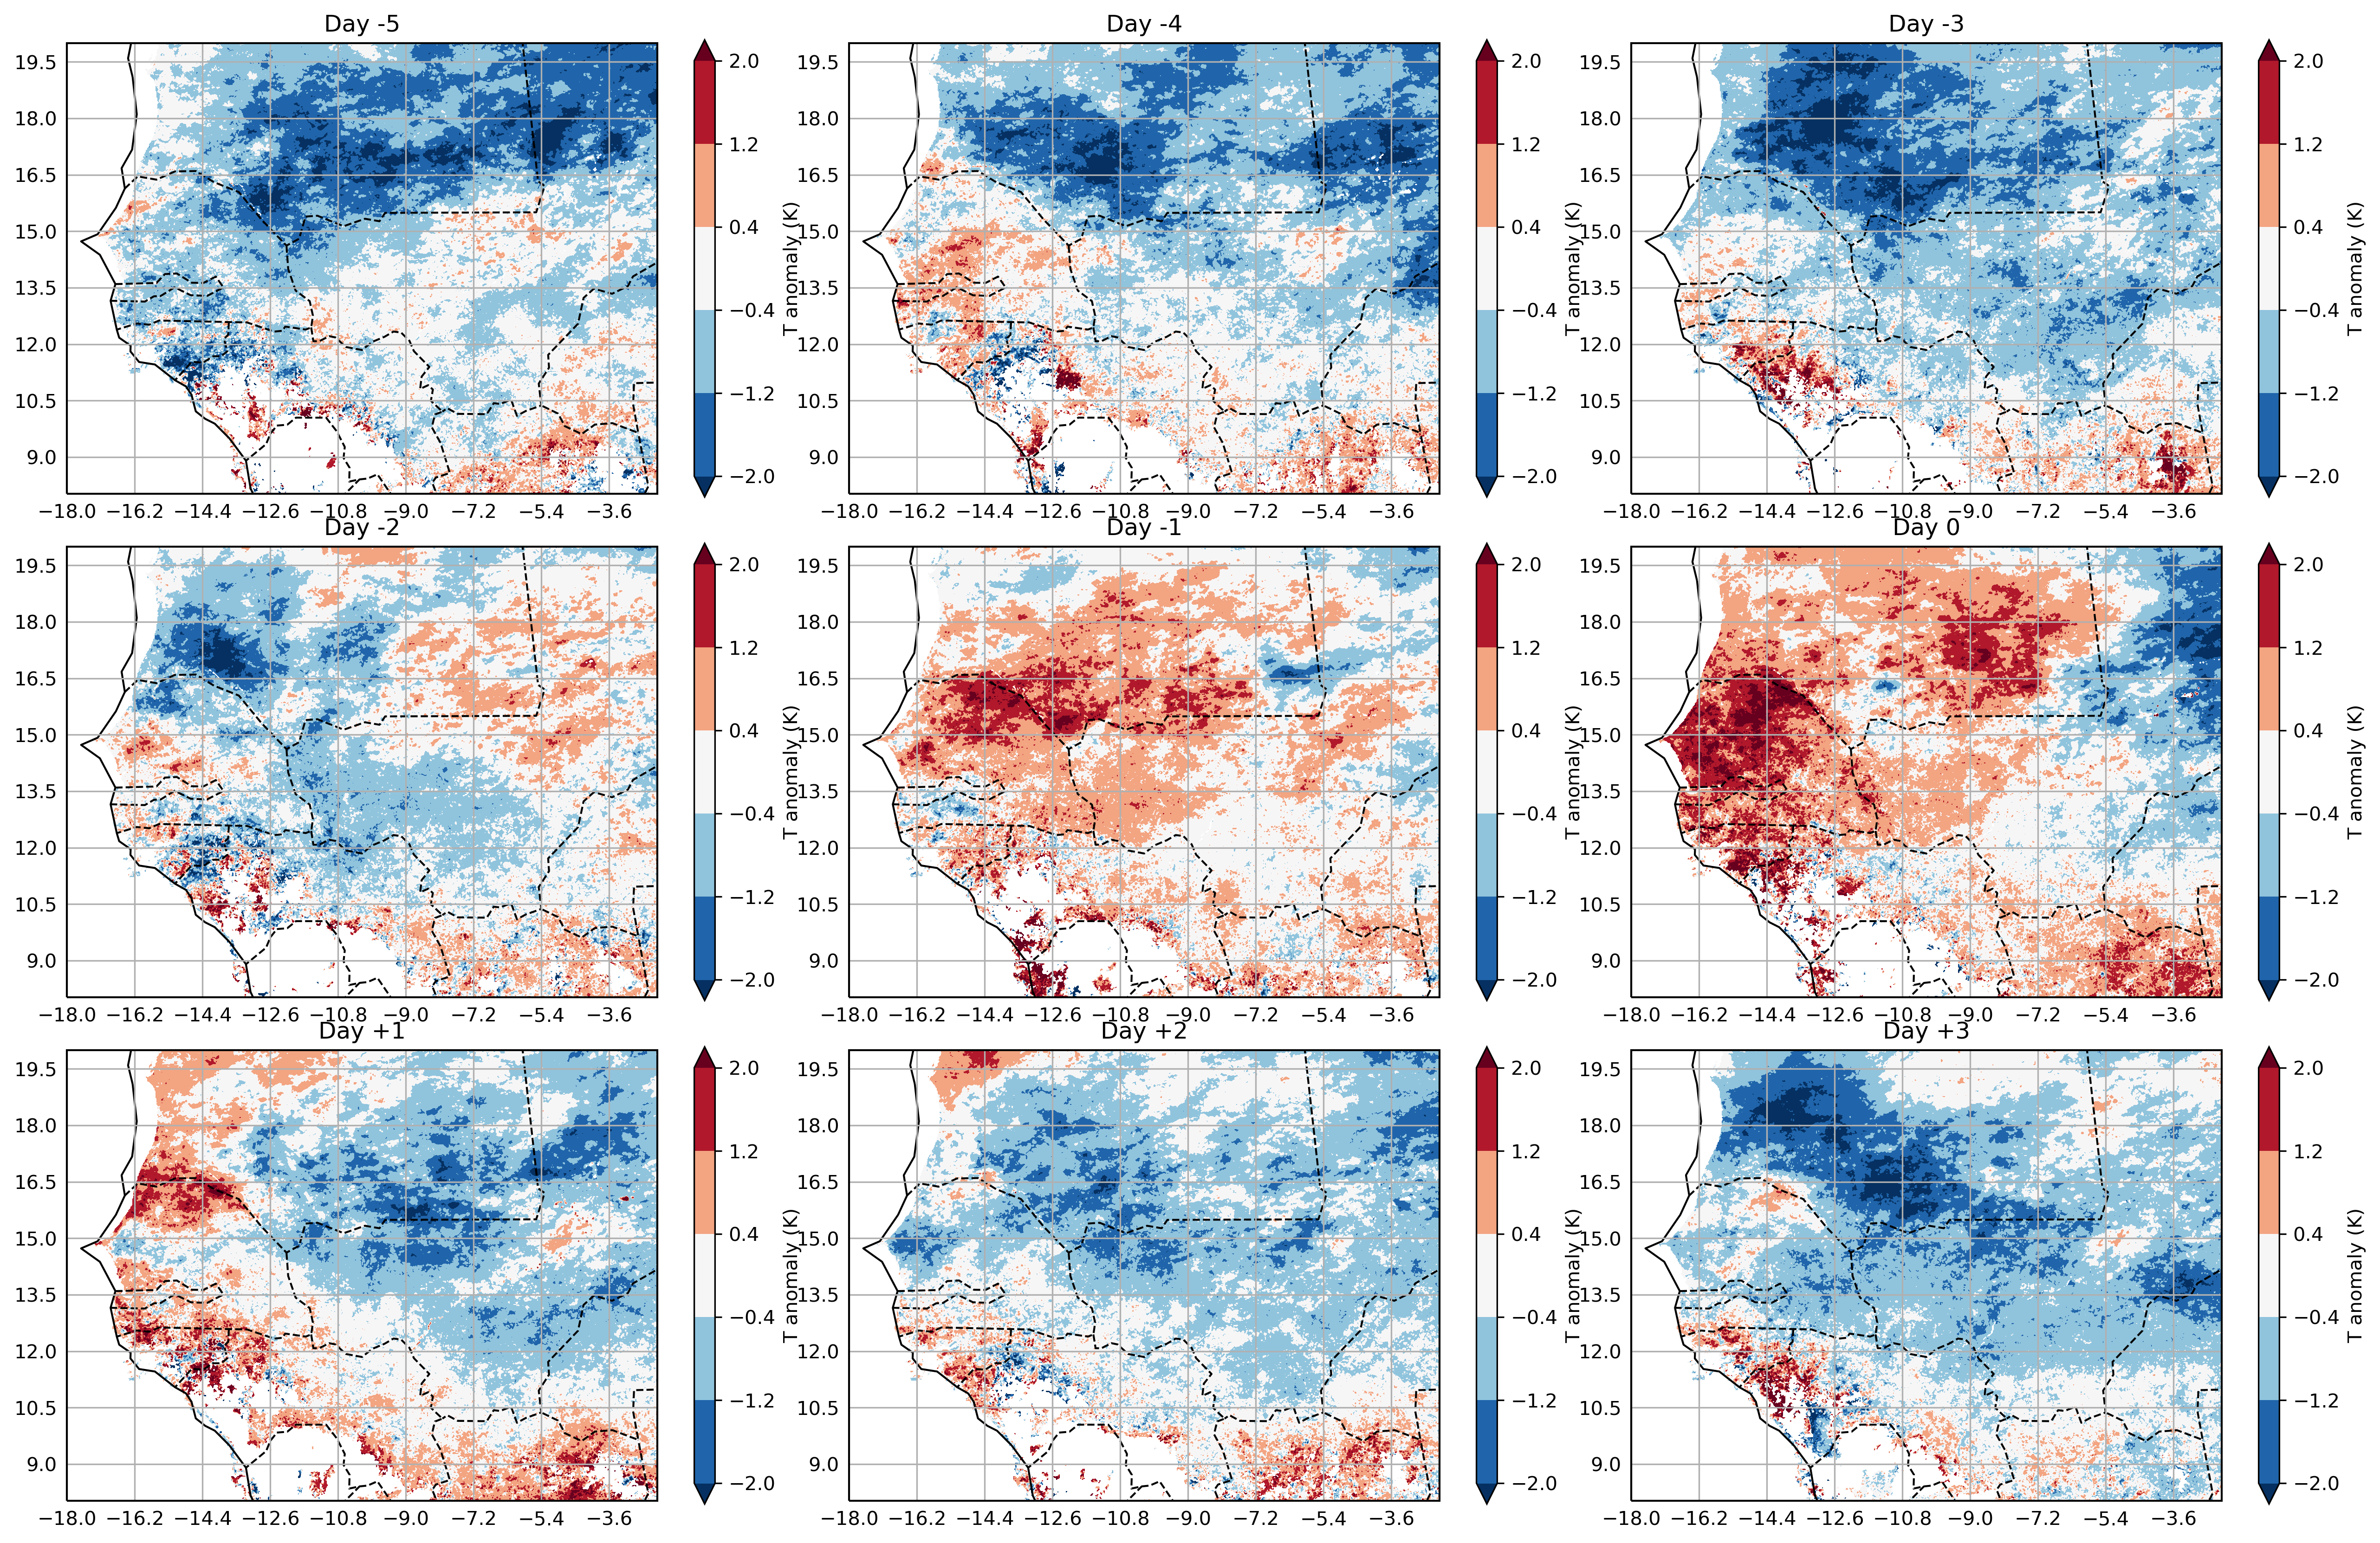

In [31]:
f = plt.figure(figsize=(17,11), dpi=300)

ax = f.add_subplot(331, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-5)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -5')

ax = f.add_subplot(332, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-4)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -4')


ax = f.add_subplot(333, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-3)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -3')

ax = f.add_subplot(334, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-2)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -2')

ax = f.add_subplot(335, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -1')

ax = f.add_subplot(336, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(0)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day 0')

ax = f.add_subplot(337, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +1')

ax = f.add_subplot(338, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(2)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +2')

ax = f.add_subplot(339, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(3)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +3')


f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/plots/lsta/NFLICS_LSTA_dakarstorms.png')

In [18]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(8,6), dpi=300)
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon-0.4, lat, t, transform=ccrs.PlateCarree(), cmap='viridis', extend='both', levels=np.arange(10,17))
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title('')
    cbar = plt.colorbar()
    cbar.set_label('Valid storm cases')
    f.canvas.draw()
    plt.tight_layout()
    
    #plt.savefig(cnst.network_data + 'figs/NFLICS/valid_cases.png')
    #plt.show()

In [95]:
def cut_kernel_lsta(xpos, ypos, arr):

    dist=200

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)

    if (np.sum(np.isfinite(kernel)) < 0.01 * kernel.size):
        return

    kmean = kernel

    if kernel.shape != (2*dist+1, 2*dist+1):
        print('WRONG SHAPE')
        return
    ycirc30, xcirc30 = u_arrays.draw_circle(dist+1, dist+1,6) # 15km radius
    k30 = np.nanmean(kmean[ycirc30, xcirc30])

    ycirc100e, xcirc100e = u_arrays.draw_circle(dist+51, dist+1, 17)  # at - 150km, draw 50km radius circle
    #data = kmean[ycirc100e,xcirc100e]
    data = kernel[dist - 10:dist + 10, dist:dist + 67]

    e100 = np.nanmean(data)

    if (np.sum(np.isfinite(data)) / data.size) < 0.01:
        print('Too small valid area')
        return
    
    if np.isnan(e100):
        print('Is nan')
        return

    return k30, e100

In [96]:
kernel2_list = []
kernel3_list = []
cnt_list = []

amsrk30 = []
amsre100 = []

ramsrk30 = []
ramsre100 = []


for date in tab.time:


    single = tab[tab.time==date]

    dt = pd.to_datetime(date)

    #ipdb.set_trace()
    fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)

    lpath = '/home/ck/DIR/cornkle/data/NFLICS/LSTA/netcdf/'

    try:
        #ipdb.set_trace()
        lsta = xr.open_dataset(lpath + 'HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_' + fdate + '1700.nc') #sma  #'AMSR_L3_LPRMv05_A_'

    except:
        print('Could not find '+fdate)


    testbox = lsta['lsta'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values

    if np.isnan(testbox).all():
            print('Testbox empty')
            continue

    lsta = lsta.sel(lon=slice(-19, -2), lat=slice(8, 25))    
    #lsta = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day))


    lsta_da = lsta['lsta'].squeeze()



    print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
    dt.day).zfill(2) + '.nc')



    ###############################Blob loop
    cores = 0

    for lat, lon in zip([14.7],[ -16.5]):


        try:
            point = lsta_da.sel(lat=lat, lon=lon, method='nearest', tolerance=0.035)
        except KeyError:
            print('Nearest point finding error')
            continue

        plat = point['lat'].values
        plon = point['lon'].values

        xpos = np.where(lsta_da['lon'].values == plon)
        xpos = int(xpos[0])
        ypos = np.where(lsta_da['lat'].values == plat)
        ypos = int(ypos[0])

        try:
            ak30, ae100 = cut_kernel_lsta(xpos, ypos, lsta_da.values)
        except TypeError:
            print('AMSR kernel error')
            continue


        amsrk30.append(ak30)
        amsre100.append(ae100)

        cores += 1

        ##### random

        y = ypos
        x = xpos

        rdist = 50
        randy50 = [y - rdist, y - rdist, y - rdist, y, y, y + rdist, y + rdist, y + rdist]
        randx50 = [x - rdist, x, x + rdist, x - rdist, x + rdist, x - rdist, x, x + rdist]
        randy50_100 = [y - rdist, y - rdist, y, y, y + rdist, y + rdist]

        rdist = 100
        randx100 = [x - rdist, x + rdist, x - rdist, x + rdist, x - rdist, x + rdist]

        rdist = 150
        randx150 = [x - rdist, x + rdist, x - rdist, x + rdist, x - rdist, x + rdist]

        randy = np.array(randy50 + randy50_100 + randy50_100)
        randx = np.array(randx50 + randx100 + randx150)

        for ry, rx in zip(randy,randx):

            if ry < 0:
                continue
            if ry > lsta_da.shape[0] - 1:
                continue

            if rx < 0:
                continue
            if rx > lsta_da.shape[1] - 1:
                continue

            try:
                lat = lsta_da['lat'][ry]
            except IndexError:
                ipdb.set_trace()
            try:
                lon = lsta_da['lon'][rx]
            except IndexError:
                ipdb.set_trace()
            try:
                point = lsta_da.sel(lat=lat, lon=lon, method='nearest', tolerance=0.035)
            except KeyError:
                print('Nearest point finding error')
                continue
            plat = point['lat'].values
            plon = point['lon'].values

            xpos = np.where(lsta_da['lon'].values == plon)
            xpos = int(xpos[0])
            ypos = np.where(lsta_da['lat'].values == plat)
            ypos = int(ypos[0])

            try:
                arc30, arce100 = cut_kernel_lsta(xpos, ypos, lsta_da.values)
            except TypeError:
                continue

            ramsrk30.append(arc30)
            ramsre100.append(arce100)

dic = {'amsr' : [amsrk30,amsre100],
       'ramsr' : [ramsrk30, ramsre100]}

Doing AMSR_20040807.nc
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Doing AMSR_20050819.nc
Too small valid area
AMSR kernel error
Doing AMSR_20050829.nc
Too small valid area
Doing AMSR_20060724.nc
Too small valid area
Too small valid area
Doing AMSR_20060726.nc


/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


Too small valid area
Too small valid area
Too small valid area
Too small valid area
Doing AMSR_20060812.nc
Too small valid area
Too small valid area
Doing AMSR_20060907.nc
Too small valid area
Doing AMSR_20070717.nc
Too small valid area
Doing AMSR_20070725.nc
Too small valid area
Doing AMSR_20070802.nc
Too small valid area
AMSR kernel error
Doing AMSR_20070823.nc
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Doing AMSR_20070906.nc
Too small valid area
Doing AMSR_20070912.nc
Too small valid area
Too small valid area
Doing AMSR_20070917.nc
Too small valid area
Doing AMSR_20080729.nc
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Doing AMSR_20080807.nc
Too small valid area
Doing AMSR_20080809.nc
Too small valid area
Too small valid area
Doing AMSR_20090808.nc
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Too small valid area
Doing AMSR_20090824.nc
Too small

In [97]:
dic

{'amsr': [[1.5272727272727273,
   2.3201428571428573,
   3.929380530973451,
   1.362264150943396,
   4.4354736842105265,
   0.033539823008849556,
   5.598849557522123,
   4.787352941176471,
   nan,
   4.0906194690265485,
   -2.063577981651376,
   1.142566371681416,
   1.9157522123893806,
   2.9442477876106192,
   -1.4634042553191489,
   2.8825000000000003,
   1.5026470588235292,
   nan,
   -0.05669642857142859,
   5.42,
   nan,
   4.816774193548387,
   2.589734513274337,
   4.372739726027397,
   -4.327368421052632,
   0.2534513274336283,
   1.01,
   nan,
   1.2698230088495577,
   3.92,
   1.1687610619469027,
   nan,
   1.8746902654867257,
   -4.789115044247788,
   2.2552212389380535,
   -0.42796296296296304,
   -1.1771681415929205,
   -2.626875,
   0.2549557522123894,
   1.86212389380531,
   -2.3033333333333332,
   0.5392631578947368,
   0.5392631578947368],
  [1.6400763358778625,
   2.83265100671141,
   5.488198804185351,
   0.6131372549019608,
   2.5298170731707317,
   0.779251824817

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
65.12% of Cells occur in warmest half


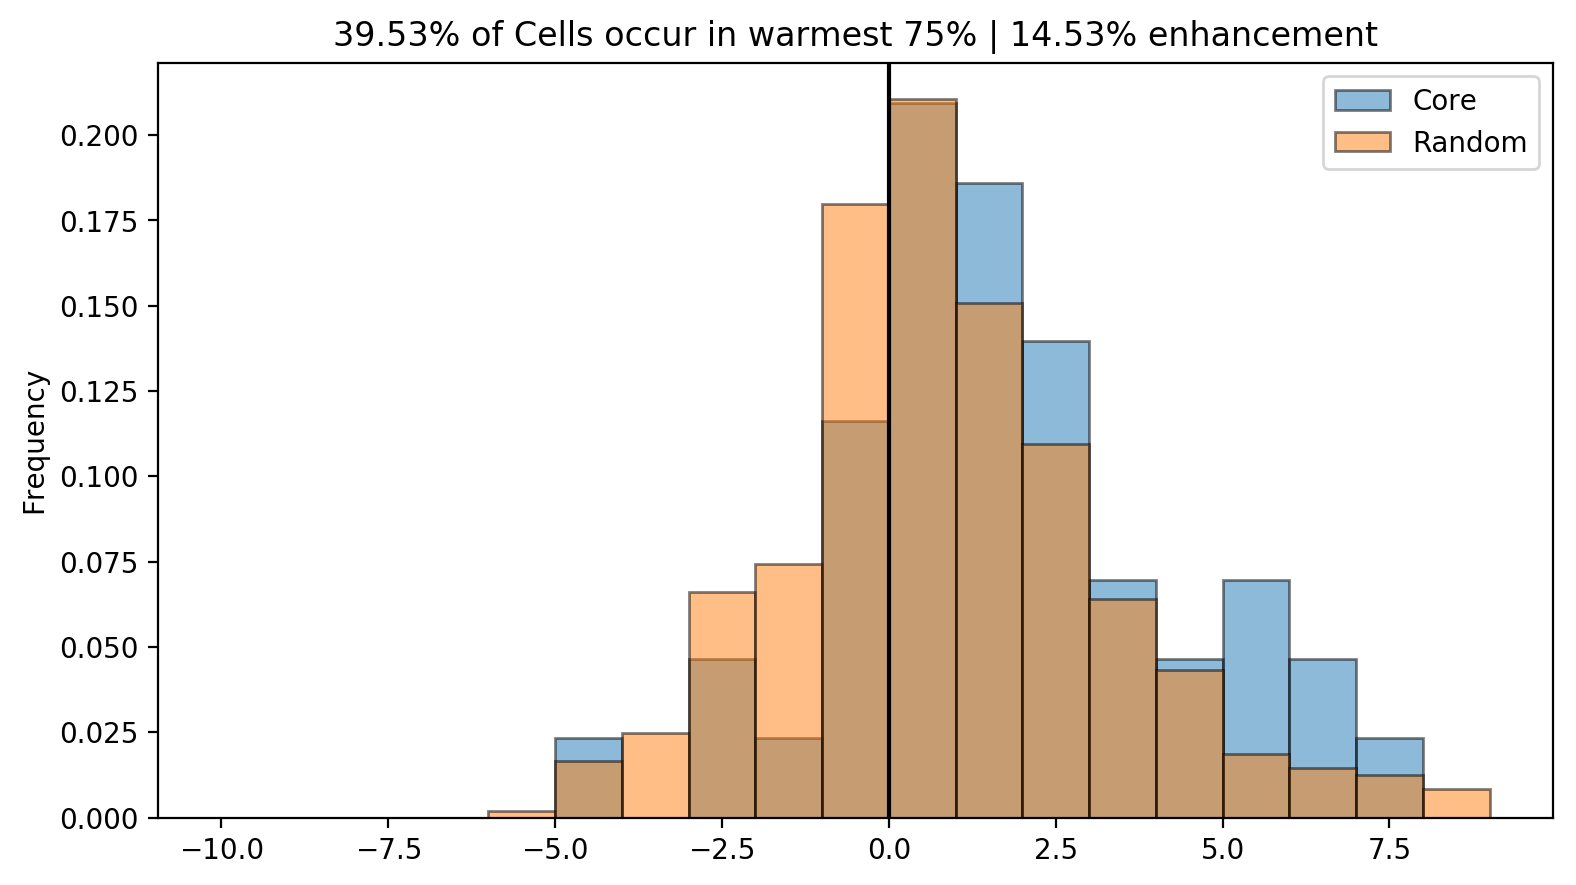

In [257]:
    cinput = np.array(dic['amsr'][1])
    rinput = np.array(dic['ramsr'][1])
    point = cinput[np.isfinite(cinput)]
    all = rinput[np.isfinite(rinput)]

    nbpoint, pointcount, bins = u_stat.histo_frequency(point, bins=np.arange(-10,10,1))
    nball, allcount, bins = u_stat.histo_frequency(all, bins=np.arange(-10, 10, 1))
    print(bins)
    bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
    bin_edge = bins[0:-1]
    width = bins[1::] - bins[0:-1]

    f = plt.figure(figsize=(9,5), dpi=200)
    ax = f.add_subplot(111)

    ax.bar(bin_edge, nbpoint, label='Core', edgecolor='k', alpha=0.5, align='edge', width=width)
    ax.bar(bin_edge, nball, label='Random', edgecolor='k', alpha=0.5, align='edge', width=width)
    plt.ylabel('Frequency')
    stri = (np.sum(cinput >= np.percentile(rinput, 75)) / cinput.size * 100).round(2)
    plt.title(str(stri)+'% of Cells occur in warmest 75% | '+ str(np.round(stri-25,2))+'% enhancement')
    plt.legend()

    stri = (np.sum(cinput >= np.percentile(rinput, 50)) / cinput.size * 100).round(2)
    print(str(stri) + '% of Cells occur in warmest half')
    
    plt.axvline(0, color='k')
    f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/example_prob.png')

In [258]:
# best fit of data
(mupoint, sigmapoint) = norm.fit(point)
(muall, sigmaall) = norm.fit(all)

# add a 'best fit' line
ypoint = mlab.normpdf( bins, mupoint, sigmapoint)
yall = mlab.normpdf(bins, muall, sigmaall)

# add a 'best fit' line
cypoint = norm.cdf( bins, mupoint, sigmapoint)
cyall = norm.cdf(bins, muall, sigmaall)

print('Core', norm.pdf(0,mupoint,sigmapoint))
print('Random', norm.pdf(0,muall,sigmaall))


Core 0.12346729407167924
Random 0.151880569360824


/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


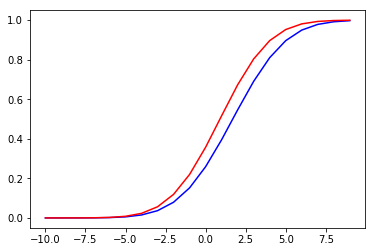

In [259]:
plt.plot(bins,cypoint, 'b')
plt.plot(bins, cyall, 'r')

65.12% of Cells occur in warmest half


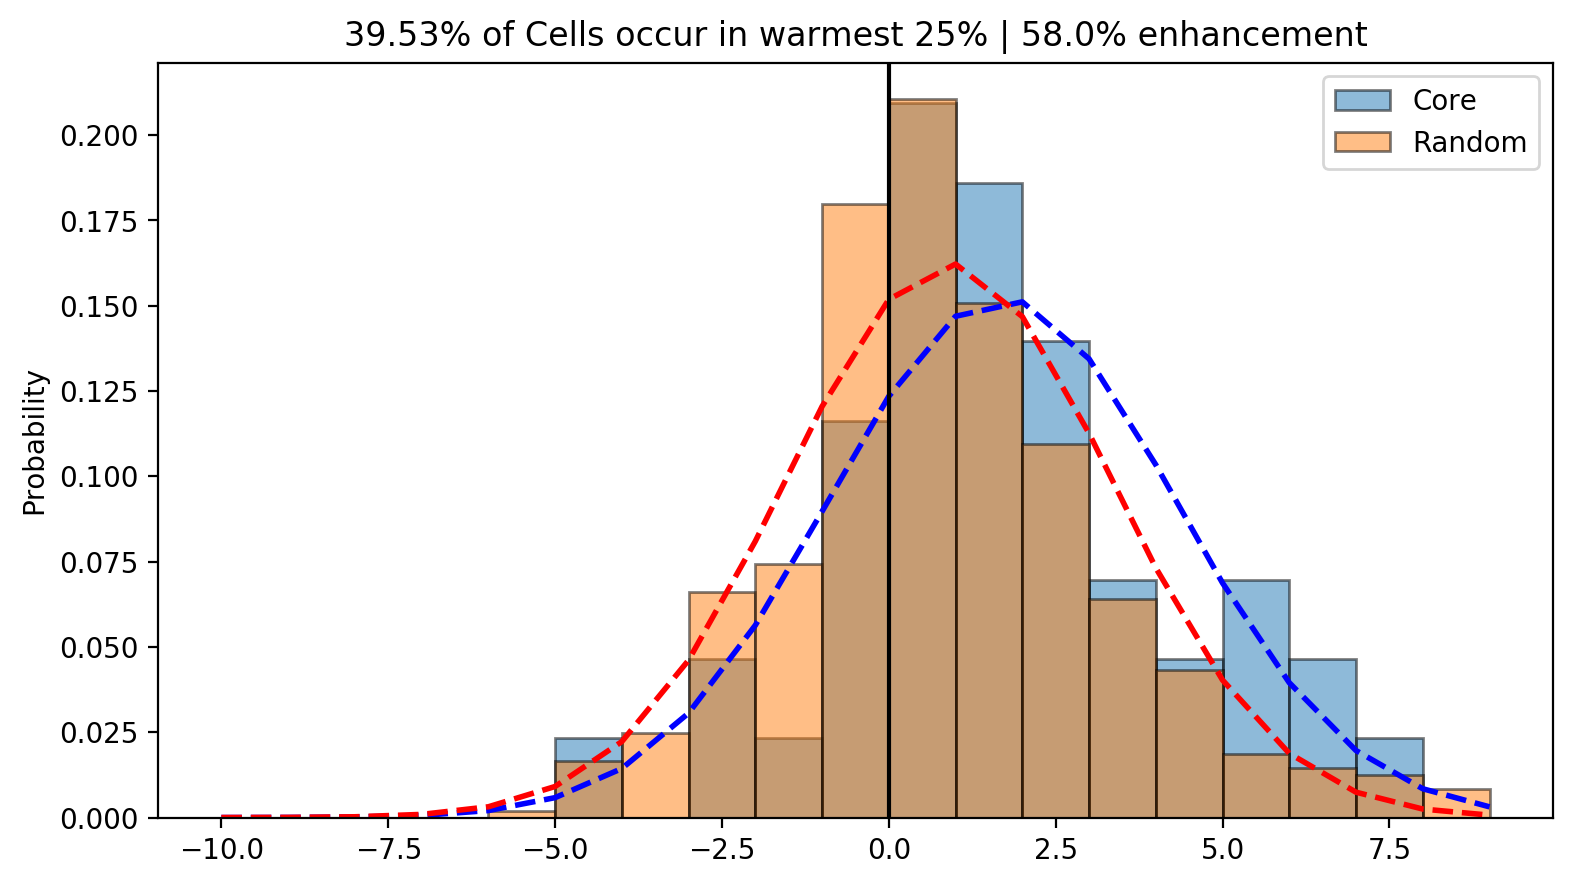

In [313]:
f = plt.figure(figsize=(9,5), dpi=200)
ax = f.add_subplot(111)

ax.bar(bin_edge, nbpoint, label='Core', edgecolor='k', alpha=0.5, align='edge', width=width)
ax.bar(bin_edge, nball, label='Random', edgecolor='k', alpha=0.5, align='edge', width=width)

plt.plot(bins, ypoint, 'b--', linewidth=2)
plt.plot(bins, yall, 'r--', linewidth=2)

plt.ylabel('Probability')
stri = (np.sum(cinput >= np.percentile(rinput, 75)) / cinput.size * 100).round(2)
enh = (stri-25)/25*100
plt.title(str(stri)+'% of Cells occur in warmest 25% | '+ str(np.round(enh))+'% enhancement')
plt.legend()

stri = (np.sum(cinput >= np.percentile(rinput, 50)) / cinput.size * 100).round(2)
print(str(stri) + '% of Cells occur in warmest half')

plt.axvline(0, color='k')
f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/example_prob_fit.png')

In [329]:
def calc_prob(x, mu_core, mu_random, sigma_core, sigma_random):
    
    corep = norm.pdf(x,mu_core,sigma_core)
    randomp = norm.pdf(x,mu_random,sigma_random)
    
    corec = norm.cdf(x,mu_core,sigma_core)
    randomc = norm.cdf(x,mu_random,sigma_random)
    
    out_pdf = (corep - randomp)/randomp

    prob_factor = 1+out_pdf

    return out_pdf, prob_factor

In [332]:
calc_prob(1, mupoint, muall, sigmapoint, sigmaall)

(-0.09439285268274139, 0.9056071473172587)

In [337]:
prob = []
factor = []
for b in bins:
    tb, fac = calc_prob(b, mupoint, muall, sigmapoint, sigmaall)
    prob.append(tb)
    factor.append(fac)

In [339]:
factor

[0.8364503905578802,
 0.7617679993760319,
 0.7078740964245995,
 0.6711816508237186,
 0.6493440849902175,
 0.6410035899208362,
 0.6456494626030977,
 0.6635656328670674,
 0.695859780106181,
 0.7445782486138184,
 0.812923566136738,
 0.9056071473172587,
 1.0293918567874523,
 1.1939121569576283,
 1.4129109131904287,
 1.7061135961553915,
 2.102092716173312,
 2.6426919997404603,
 3.389939845308801,
 4.436987370651416]

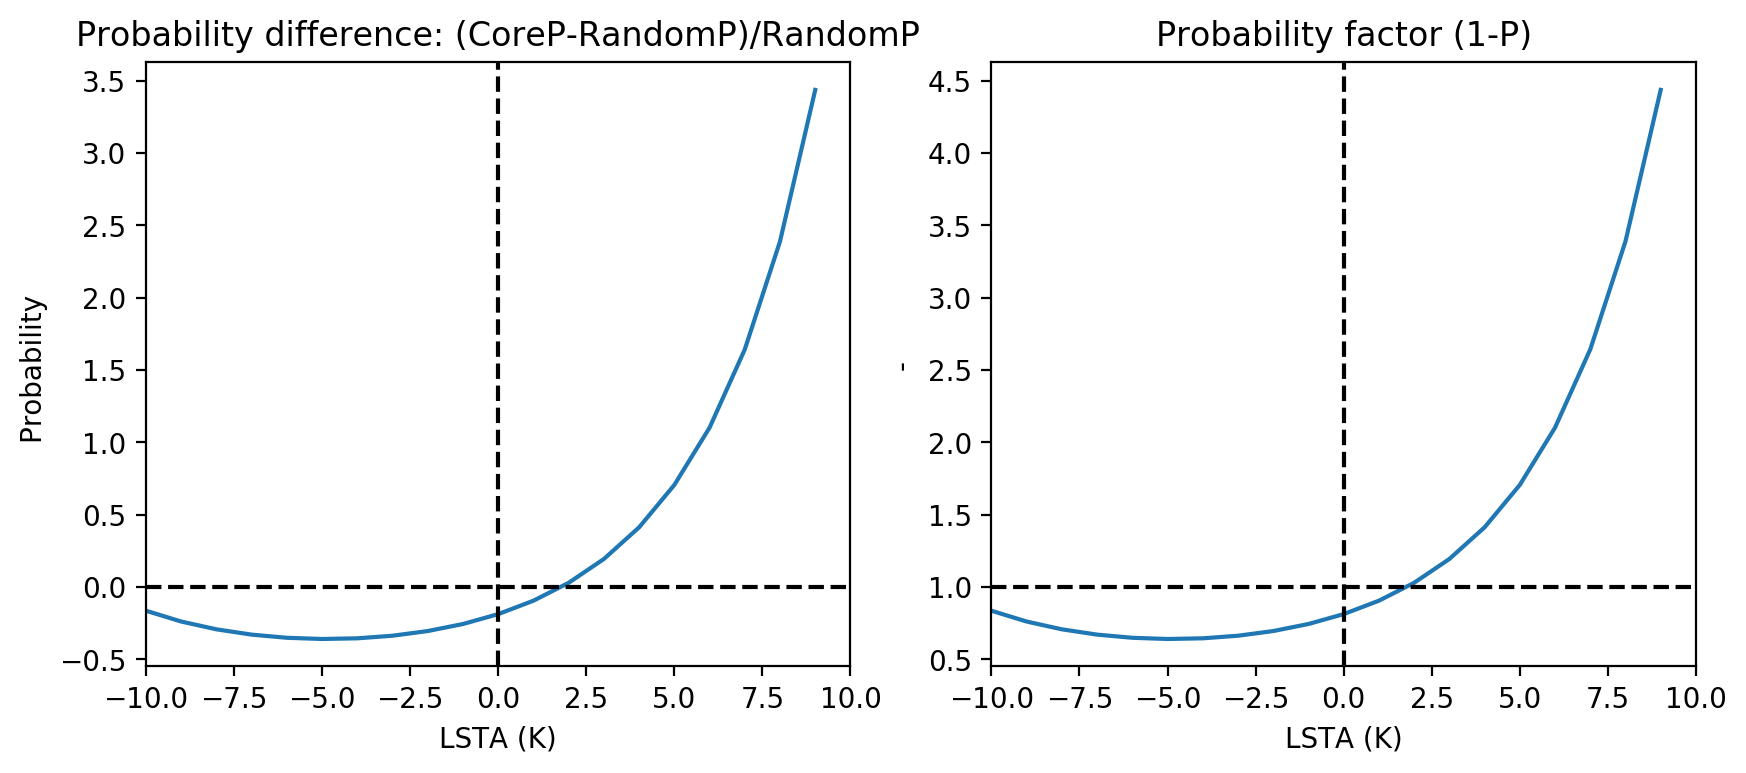

In [356]:
f = plt.figure(figsize=(10,4), dpi=200)
ax = f.add_subplot(121)
plt.plot(bins,np.array(prob))
plt.ylabel('Probability ')
plt.axhline(0,color='k', linestyle='dashed')
plt.axvline(0,color='k', linestyle='dashed')
plt.xlim(-10,10)
plt.xlabel('LSTA (K)')
plt.title('Probability difference: (CoreP-RandomP)/RandomP')

ax = f.add_subplot(122)
plt.plot(bins,np.array(factor))
plt.ylabel('-')
plt.axhline(1,color='k', linestyle='dashed')
plt.axvline(0,color='k', linestyle='dashed')
plt.xlim(-10,10)
plt.xlabel('LSTA (K)')
plt.title('Probability factor (1-P)')
f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/p_change.png')

In [349]:
testlsta = xr.open_dataset(lpath + 'HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200806191700.nc')

In [350]:
testlsta

<xarray.Dataset>
Dimensions:  (lat: 714, lon: 1436)
Coordinates:
  * lat      (lat) float64 0.0 0.02805 0.0561 0.08415 ... 19.92 19.94 19.97 20.0
  * lon      (lon) float64 -20.0 -19.97 -19.94 -19.92 ... 19.92 19.94 19.97 20.0
Data variables:
    lsta     (lat, lon) float64 ...
    NbSlot   (lat, lon) int16 ...

In [351]:
testlsta = testlsta.sel(lat=slice(10,20), lon=slice(-17.2,-2))

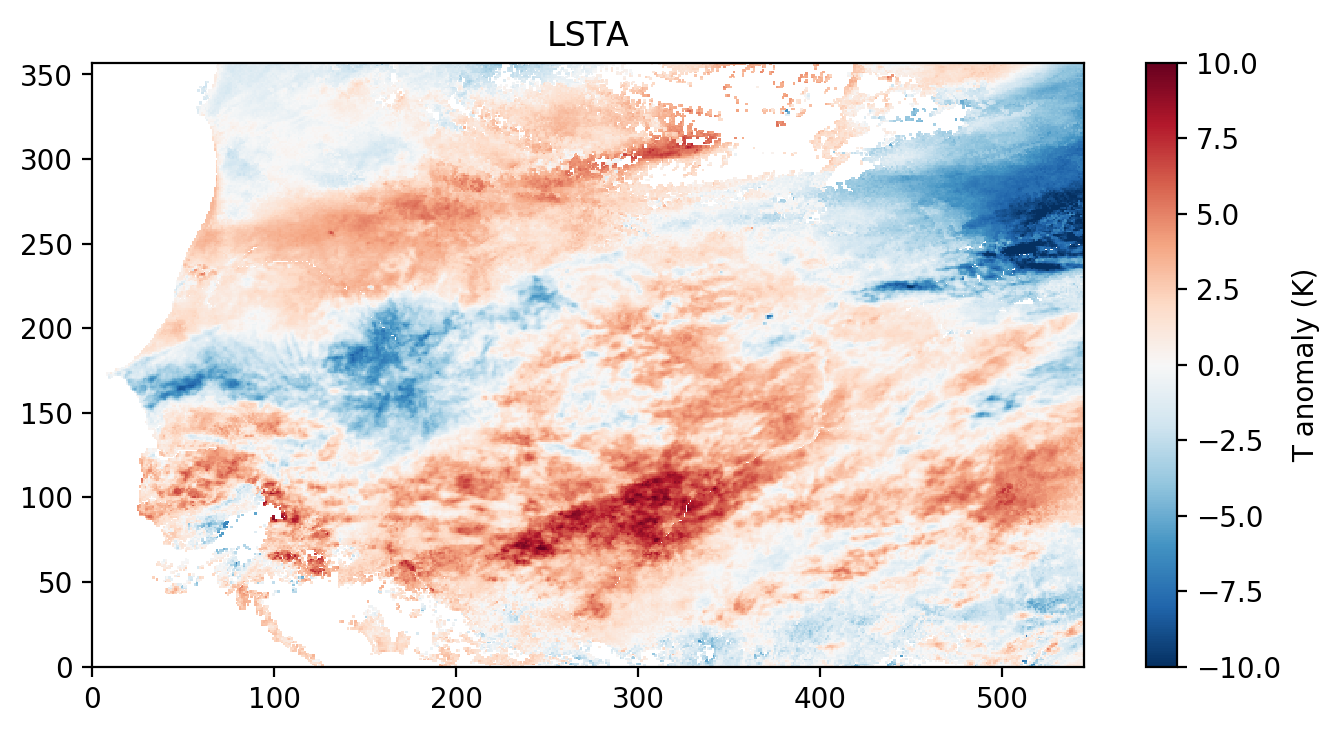

In [352]:
f=plt.figure(figsize=(8,4), dpi=200)
plt.pcolormesh(testlsta['lsta'], cmap='RdBu_r', vmin=-10, vmax=10)
plt.title('LSTA')
cbar = plt.colorbar()
cbar.set_label('T anomaly (K)')
#f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/example_day_map.png')

In [318]:
probability_map = np.zeros_like(testlsta['lsta'].values)*np.nan

In [353]:
for i in range(probability_map.shape[0]):
    for j in range(probability_map.shape[1]):
        p, fac = calc_prob(testlsta['lsta'].values[i,j], mupoint, muall, sigmapoint, sigmaall)
        probability_map[i,j] = fac
        

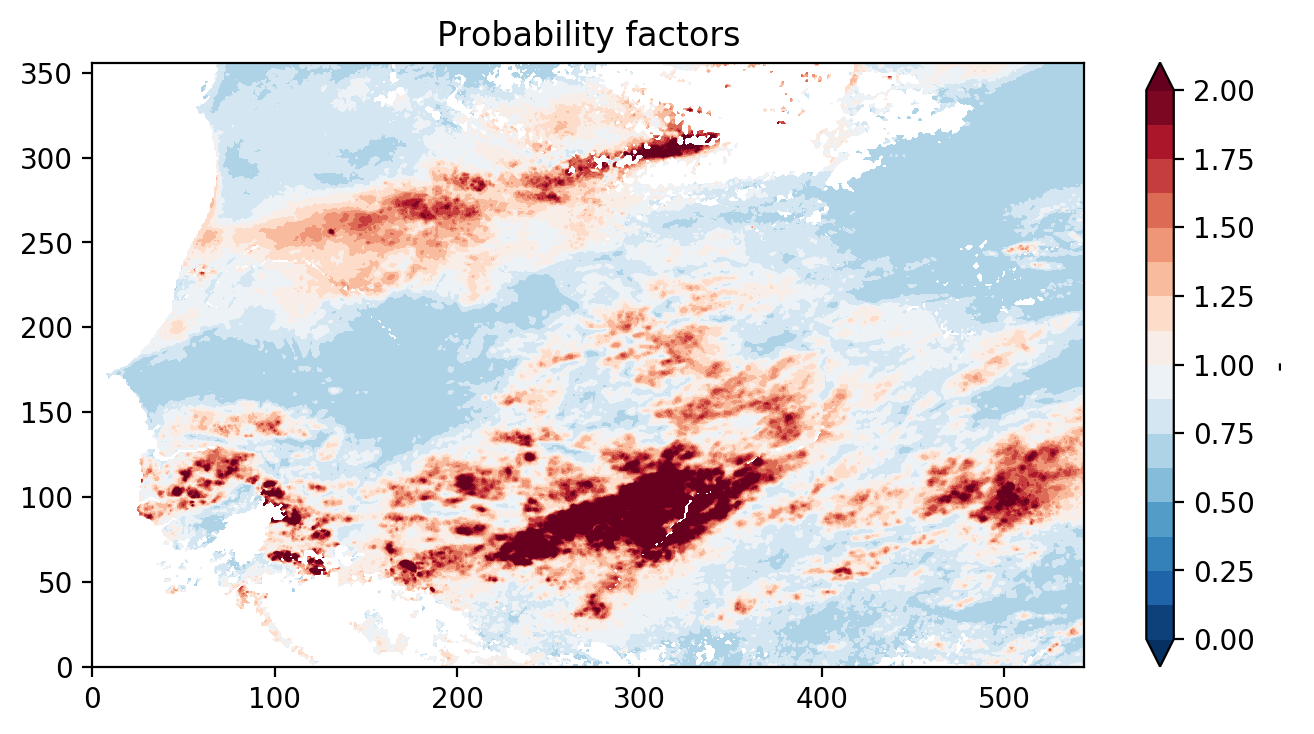

In [355]:
f=plt.figure(figsize=(8,4), dpi=200)
plt.contourf(probability_map, cmap='RdBu_r',levels=np.linspace(0,2,17), extend='both')
#plt.contour(testlsta['lsta'], cmap='RdBu_r', vmin=-10, vmax=10)
plt.title('Probability factors')
cbar = plt.colorbar()
cbar.set_label('-')
f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/example_day_map_probability.png')

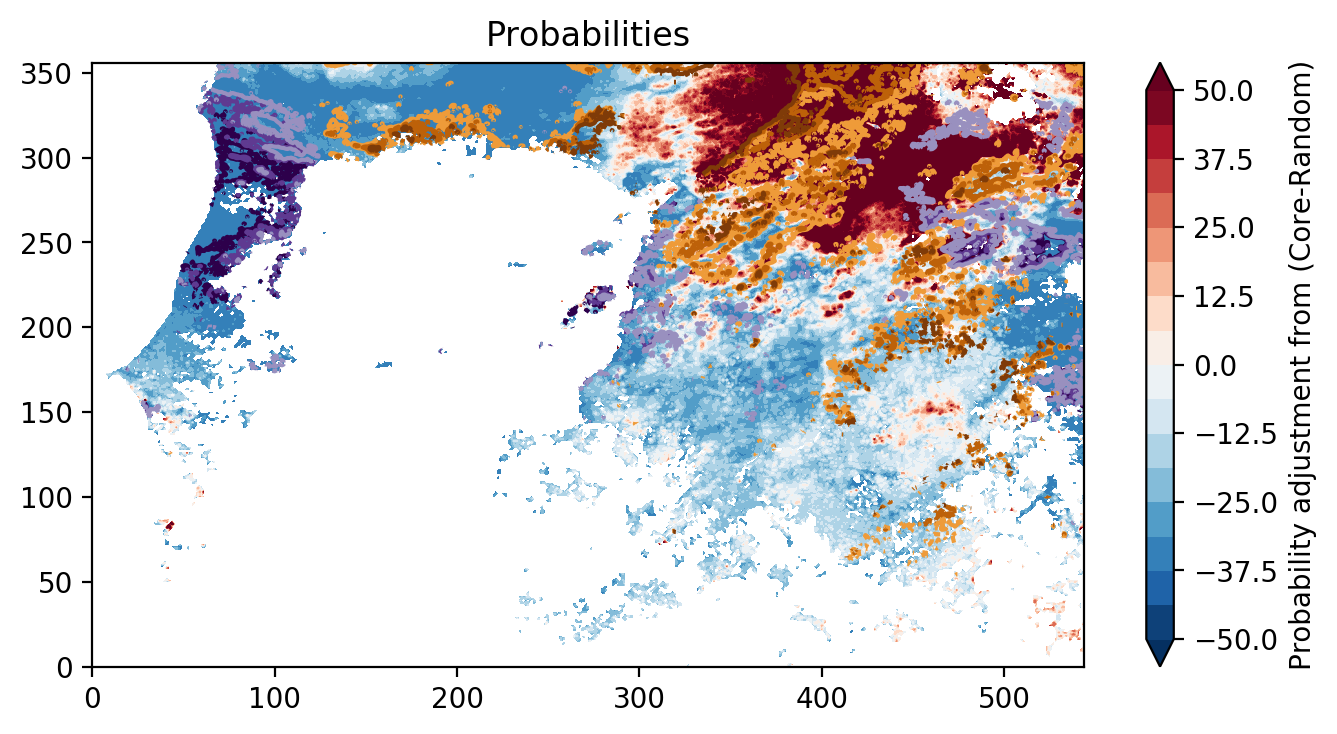

In [304]:
f=plt.figure(figsize=(8,4), dpi=200)
plt.contourf(probability_map, cmap='RdBu_r',levels=np.linspace(-50,50,17), extend='both')
#plt.contour(testlsta['lsta'], cmap='RdBu_r', vmin=-10, vmax=10)
cbar = plt.colorbar()
plt.contour(testlsta1['lsta'].values-testlsta['lsta'].values, cmap='PuOr_r', levels=[-8,-6,-4,4,6,8], extend='both')

plt.title('Probabilities')

cbar.set_label('Probability adjustment from (Core-Random)')
#f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/example_day_map_probability.png')

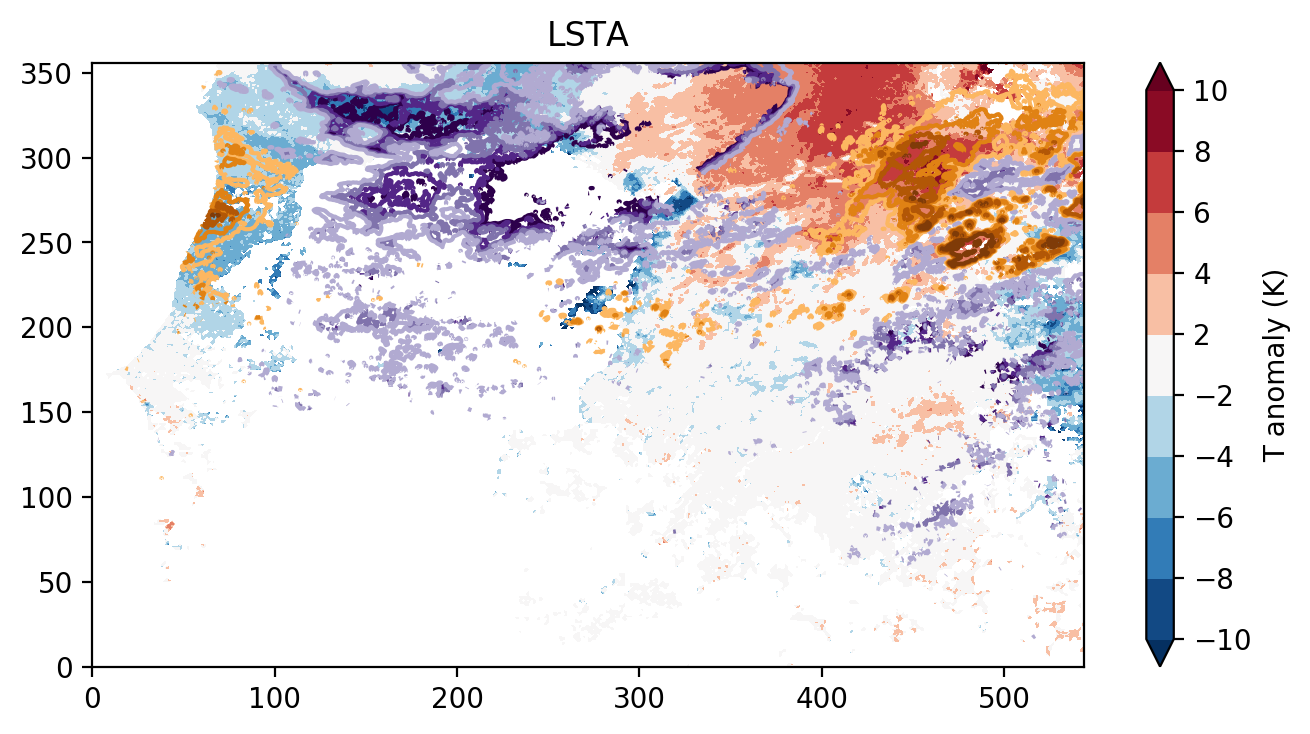

In [303]:
testlsta1 = xr.open_dataset(lpath + 'HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_201208251700.nc')
testlsta1 = testlsta1.sel(lat=slice(10,20), lon=slice(-17.2,-2))
f=plt.figure(figsize=(8,4), dpi=200)
plt.contourf(testlsta1['lsta'].values, cmap='RdBu_r', levels=[-10,-8,-6,-4,-2,2,4,6,8,10], extend='both')

plt.title('LSTA')
cbar = plt.colorbar()
plt.contour(testlsta['lsta'].values, cmap='PuOr_r', levels=[-10,-8,-6,-4,4,6,8,10])
cbar.set_label('T anomaly (K)')
#f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/plots/lsta/example_day_map.png')

In [ ]:
def normcdf(x, mu, sigma):
    t = x-mu;
    y = 0.5*erfcc(-t/(sigma*sqrt(2.0)));
    if y>1.0:
        y = 1.0;
    return y

def normpdf(x, mu, sigma):
    u = (x-mu)/abs(sigma)
    y = (1/(sqrt(2*pi)*abs(sigma)))*exp(-u*u/2)
    return y

def normdist(x, mu, sigma, f):
    if f:
        y = normcdf(x,mu,sigma)
    else:
        y = normpdf(x,mu,sigma)
    return y